In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
df = pd.read_excel("Real estate valuation data set.xlsx")

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.drop(['No', 'X1 transaction date', 'X5 latitude', 'X6 longitude'], axis = 1, inplace = True)
df.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,32.0,84.87882,10,37.9
1,19.5,306.59470,9,42.2
2,13.3,561.98450,5,47.3
3,13.3,561.98450,5,54.8
4,5.0,390.56840,5,43.1


In [5]:
df.columns

Index(['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'Y house price of unit area'],
      dtype='object')

In [6]:
features = df[['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores']]
target = df['Y house price of unit area']
y = np.array(target).reshape(-1, 1)

### Calculating theta using Normal Equation
***theta = (X<sup>T</sup>X)<sup>-1</sup>X<sup>T</sup>y***

In [7]:
m = len(y)
n = features.shape[1]
X = np.ones([m, n+1])
X[:, 1:] = features
mat = np.dot(np.transpose(X), X)
inv = np.linalg.inv(mat)
k = np.dot(np.transpose(X), y)
theta = np.dot(inv, k)

#### Calculating Predictions

In [8]:
pred = np.dot(X, theta)

#### Calculating error/Cost function

In [9]:
sqrt(mean_squared_error(target, pred))

9.206557794456211

### sklearn LinearRegression

In [10]:
linreg = LinearRegression().fit(features, target)
sk_preds = linreg.predict(features)
sqrt(mean_squared_error(target, sk_preds))

9.206557794456211

#### Making theta for sklearn

In [11]:
sk_theta = np.ones([n+1, 1])
sk_theta[1:, 0] = linreg.coef_
sk_theta[0, 0] = linreg.intercept_

#### Comparing theta from sklearn & Normal Equation

In [12]:
print(theta)
print(sk_theta)

[[ 4.29772862e+01]
 [-2.52855827e-01]
 [-5.37912962e-03]
 [ 1.29744248e+00]]
[[ 4.29772862e+01]
 [-2.52855827e-01]
 [-5.37912962e-03]
 [ 1.29744248e+00]]


In [13]:
sqrt(mean_squared_error(target, sk_preds)) - sqrt(mean_squared_error(target, pred))

0.0

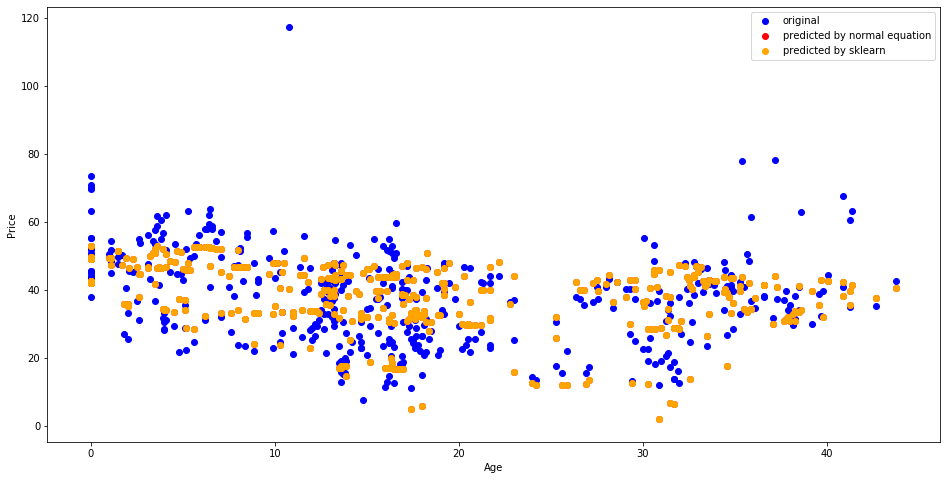

In [14]:
plt.figure(figsize = (16, 8))
plt.scatter(df['X2 house age'], target, color="blue", label="original")
plt.scatter(df['X2 house age'], pred, color="red", label="predicted by normal equation")
plt.scatter(df['X2 house age'], sk_preds, color="orange", label="predicted by sklearn")
plt.xlabel('Age')
plt.ylabel('Price')
plt.legend()
plt.show()

**According to the results, theta obtained from normal equation is approximately equal to the theta given by scikit learn's in-built algorithm `LinearRegression` where theta is basically the weights for the features of our training set.<br>
Hence we successfully implemented Linear Regression from scratch for multiple variables.**

### Linear Regression with Multiple Variables with Regularized Gradient Descent

#### Calculating theta using Normal Equation
***theta = (X<sup>T</sup>X + lambda.matrix)<sup>-1</sup>X<sup>T</sup>y***

In [15]:
X.shape

(414, 4)

In [16]:
y.shape

(414, 1)

In [17]:
n = X.shape[1]
mat = np.zeros([n, n])
for i in range(1, n):
    mat[i, i] = 1
print(mat)

[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [18]:
m = len(y)
n = features.shape[1]
X = np.ones([m, n+1])
X[:, 1:] = features
# regularization parameter lambda
lamb = 100
matrix = np.dot(np.transpose(X), X) + lamb * mat
inv = np.linalg.inv(matrix)
k = np.dot(np.transpose(X), y)
reg_theta = np.dot(inv, k)

#### Calculating Predictions

In [19]:
reg_pred = np.dot(X, reg_theta)

#### Comparing theta from sklearn, Normal Equation & regularized normal equation

In [20]:
print(reg_theta)
print(sk_theta)
print(theta)

[[ 4.32618588e+01]
 [-2.51461287e-01]
 [-5.45677032e-03]
 [ 1.24245747e+00]]
[[ 4.29772862e+01]
 [-2.52855827e-01]
 [-5.37912962e-03]
 [ 1.29744248e+00]]
[[ 4.29772862e+01]
 [-2.52855827e-01]
 [-5.37912962e-03]
 [ 1.29744248e+00]]


In [21]:
sqrt(mean_squared_error(target, reg_pred)) - sqrt(mean_squared_error(target, sk_preds))

0.0009007366266242656

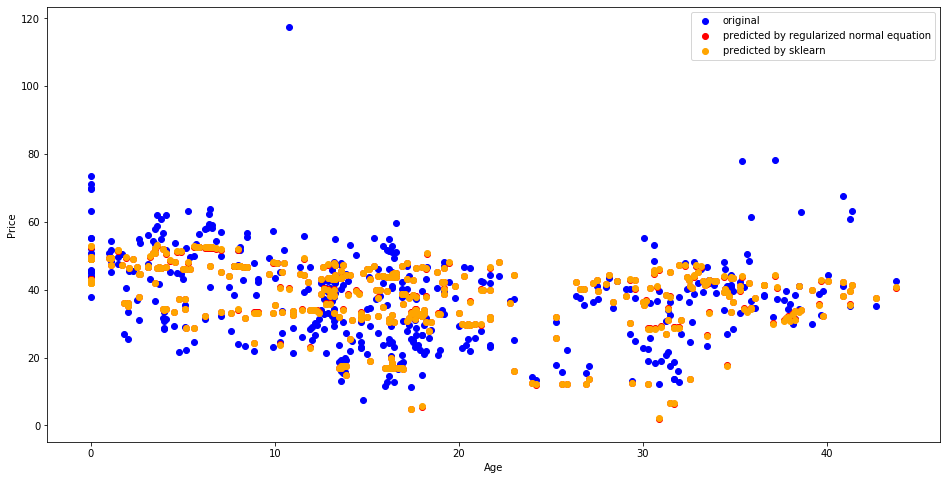

In [22]:
plt.figure(figsize = (16, 8))
plt.scatter(df['X2 house age'], target, color="blue", label="original")
plt.scatter(df['X2 house age'], reg_pred, color="red", label="predicted by regularized normal equation")
plt.scatter(df['X2 house age'], sk_preds, color="orange", label="predicted by sklearn")
plt.xlabel('Age')
plt.ylabel('Price')
plt.legend()
plt.show()